Found 28709 images belonging to 7 classes.
Found 0 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


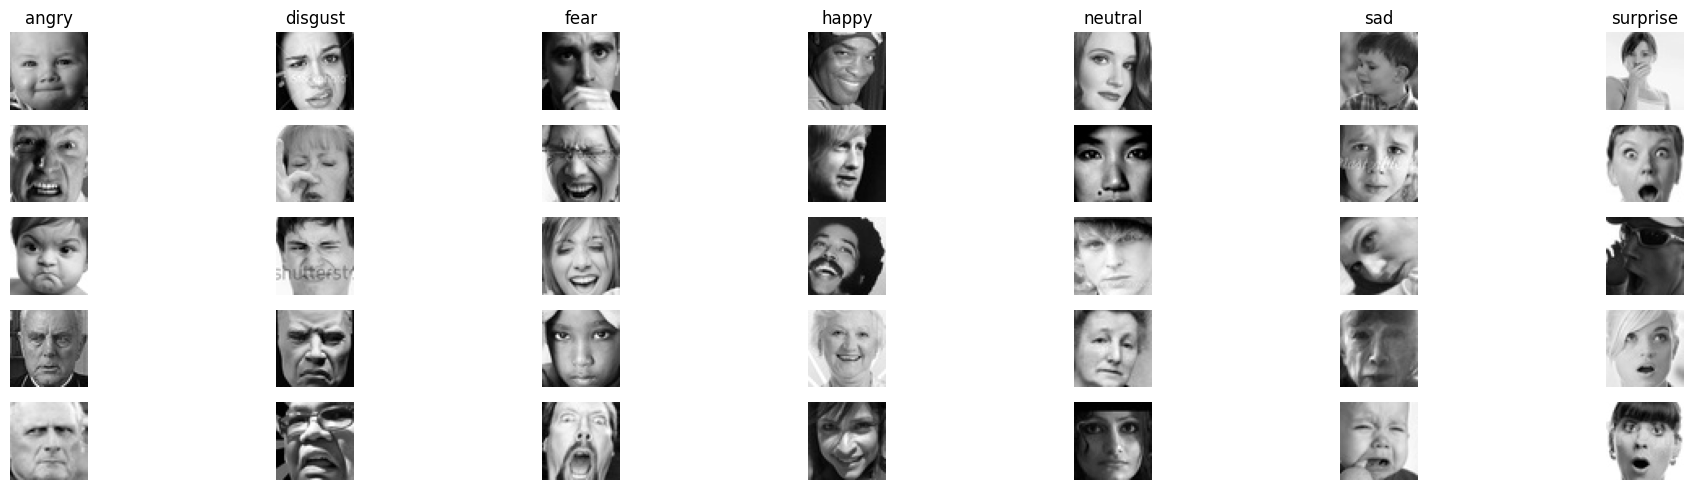

In [4]:
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

#putanja do direktoriuma skupa za trening
direktorijum_train='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\train'

#putanja do direktoriuma skupa za test
direktorijum_test='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\test'

#imena klasa
klase=['angry','disgust','fear','happy','neutral','sad','surprise']
br_klasa=len(klase)

# kreiranje objekta ImageDataGenerator gde se odmah vrsi normalizacija ucitanih slika za trening
# i odvajanje za validacioni skup
train_gen=tf.keras.preprocessing.image.ImageDataGenerator()
# kreiranje objekta ImageDataGenerator gde se odmah vrsi normalizacija ucitanih slika za test
test_gen=tf.keras.preprocessing.image.ImageDataGenerator()

# ucitavanje slika i prosledjivanje relevantnih parametara za trening metodi objekta ImageDataGenerator
# velicina batcha je 32 slike 
train_batches=train_gen.flow_from_directory(
    directory=direktorijum_train,
    target_size=(48,48),
    shuffle=True,
    classes=klase,
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# kreiranje objekta za batch za validaciju
val_batches=train_gen.flow_from_directory(
    directory=direktorijum_train,
    target_size=(48,48),
    shuffle=True,
    classes=klase,
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# kreiranje objekta za batch za test
test_batches=train_gen.flow_from_directory(
    directory=direktorijum_test,
    target_size=(48,48),
    shuffle=True,
    classes=klase,
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)
broj_klasa = 7
slike_po_klasi = 5
fig, axes = plt.subplots(slike_po_klasi, broj_klasa, figsize=(20, 5))
prikazane_slike_po_klasi = {klasa: 0 for klasa in klase}


# class_mode='sparse' da bi kod ispod radio zbog [klasa = klase[int(label)]]
# vrsimo iteraciju kroz svaki batch dok ne prikazemo slike iz svake klase po 5 puta
while any(broj < slike_po_klasi for broj in prikazane_slike_po_klasi.values()):
    images, labels = next(train_batches) #uzimanje iz slika i labela iz trening skupa
    #iteriranje korz slike 
    # iteriranje kroz slike i labele iz batcha
    for img, label in zip(images, labels):
        klasa_idx = np.argmax(label)  # index klase
        klasa = klase[klasa_idx]  # ime klase preko njenog indexa(te klase) 
        if prikazane_slike_po_klasi[klasa] < slike_po_klasi:
        
            red = prikazane_slike_po_klasi[klasa]
            kolona = klase.index(klasa)
            # plotovanje
            axes[red, kolona].imshow(img.reshape(48, 48), cmap='gray')
            axes[red, kolona].axis('off')
            if red == 0:
                axes[red, kolona].set_title(klasa)
        
            prikazane_slike_po_klasi[klasa] += 1


plt.tight_layout()
plt.show()